In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst
import seaborn as sns
import statsmodels
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import laplace

In [2]:
sns.set()

In [3]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

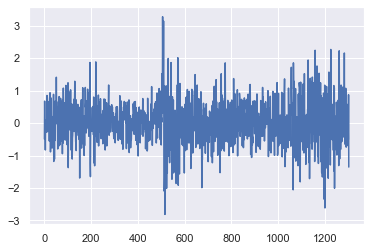

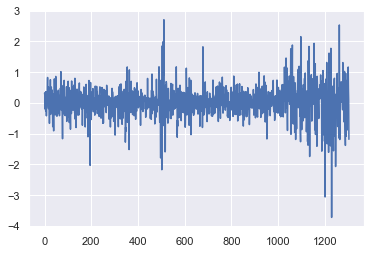

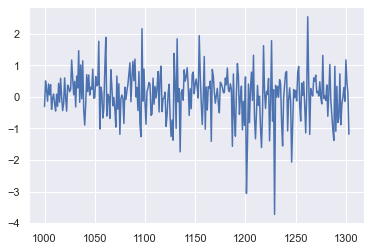

In [4]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100
jp = jpy1[1000:]

plt.plot(aud1)
plt.show()
plt.plot(jpy1)
plt.show()

plt.plot(jp)
plt.show()

In [255]:
jpy2 = -jpy1

---
# PARAMETRYCZNE

In [29]:

m = np.mean(jpy1)
s = np.std(jpy1)/np.sqrt(2)

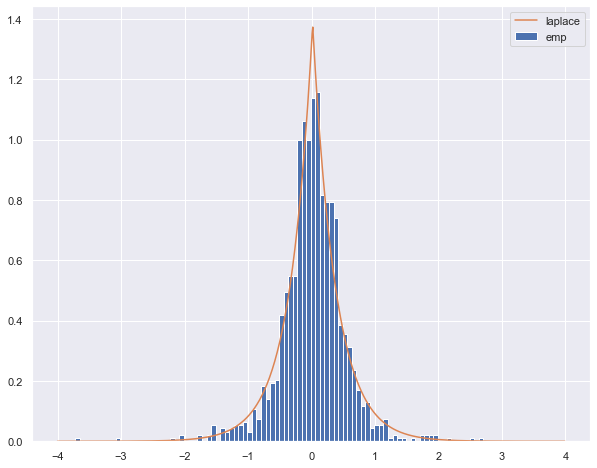

In [30]:
plt.figure(figsize=(10,8))

plt.hist(jpy1, bins=90, density = True, label="emp")
xs = np.arange(-4,4,0.01)
y3 = [laplace.pdf(x, loc=m, scale = s) for x in xs]
plt.plot(xs,y3, label="laplace")
plt.legend()
plt.show()

In [31]:
ss = np.random.laplace(m, s, 1000)
x2,y2 = dcst.ecdf(ss) 

In [32]:
x1,y1 = dcst.ecdf(jpy1)

In [33]:
print(stats.kstest(y1, y2))

KstestResult(statistic=0.0009938650306748466, pvalue=1.0)


$VaR_\alpha = \sigma F^{-1}(\alpha)+\mu$

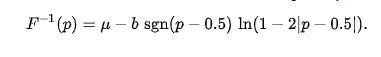
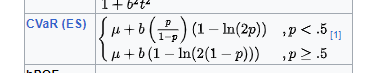

In [34]:
## std = 2b^2

In [35]:
def inversed(m, b, p):
    return m - b*np.sign(p-0.5)*np.log(1-2*abs(p-0.5))

In [36]:
s

0.3617660297385362

In [37]:
inversed(np.mean(jpy1), np.std(jpy1)/np.sqrt(2),  0.99)

1.432920729494122

In [38]:
s*inversed(0, 1,  0.99) + m

1.432920729494122

In [39]:
s*laplace.ppf(0.99)+m

1.432920729494122

In [40]:
s*laplace.ppf(0.95)+m

0.8506807658021598

# HISTORYCZNE
## symulacja historyczna zwykła

just kwantyl:
$$VaR_\alpha = q_\alpha$$

In [17]:
print(np.quantile(jpy1,0.99), np.quantile(jpy1,0.95), np.quantile(jpy1,0.01), np.quantile(jpy1,0.05))

1.3716491971939522 0.7447800719704201 -1.5146203591037644 -0.7807782370960401


## historyczna ważona

In [63]:
def ważona(l, data, alpha):
    T = len(data)
    w1 = 1/(1+sum([l**(t+1) for t in range((T-1))]))
    wt = reversed([l**t*w1 for t in range(T)])
    ## macierze L vs waga
    d = {"data": data, "waga":wt}
    df1 = pd.DataFrame(d)
    df2 = df1.sort_values(by=['data'])
    df2["cdf"] = np.cumsum(df2["waga"])
    #print(df2.iloc[sum(df2["cdf"] < alpha)-1])
    #print(df2.iloc[sum(df2["cdf"] < alpha)])
    return df2, df2.iloc[sum(df2["cdf"] < alpha)]

In [50]:
aa = ważona(0.95, jpy1, 0.99)
aa = ważona(0.95, jpy1, 0.95)
cdf = np.array(aa[0]["cdf"])

0.050000000000000044
data    1.275730
waga    0.000031
cdf     0.978695
Name: 1159, dtype: float64
data    1.312504
waga    0.013176
cdf     0.991871
Name: 1277, dtype: float64
0.050000000000000044
data    1.161998e+00
waga    3.553735e-08
cdf     9.357943e-01
Name: 1027, dtype: float64
data    1.167528
waga    0.042869
cdf     0.978663
Name: 1300, dtype: float64


In [51]:
aa = ważona(0.95, jpy1[1100:], 0.99)
aa = ważona(0.95, jpy1[1100:], 0.95)
cdf = np.array(aa[0]["cdf"])

0.050001427571545055
data    1.275730
waga    0.000031
cdf     0.978696
Name: 1159, dtype: float64
data    1.312504
waga    0.013176
cdf     0.991872
Name: 1277, dtype: float64
0.050001427571545055
data    1.051447
waga    0.000168
cdf     0.935795
Name: 1192, dtype: float64
data    1.167528
waga    0.042870
cdf     0.978665
Name: 1300, dtype: float64


In [52]:
aa = ważona(0.95, jpy1[900:], 0.99)
aa = ważona(0.95, jpy1[900:], 0.95)
cdf = np.array(aa[0]["cdf"])

0.05000000005003879
data    1.275730
waga    0.000031
cdf     0.978695
Name: 1159, dtype: float64
data    1.312504
waga    0.013176
cdf     0.991871
Name: 1277, dtype: float64
0.05000000005003879
data    1.161998e+00
waga    3.553735e-08
cdf     9.357943e-01
Name: 1027, dtype: float64
data    1.167528
waga    0.042869
cdf     0.978663
Name: 1300, dtype: float64


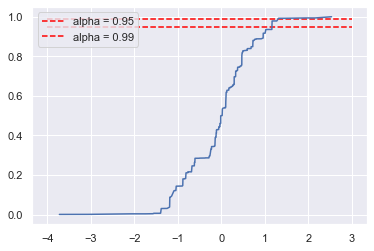

In [53]:
plt.plot(np.array(aa[0]["data"]), cdf)
plt.hlines(0.95, -4,3, linestyles='dashed', color="red", label="alpha = 0.95")
plt.hlines(0.99, -4,3, linestyles='dashed', color="red", label="alpha = 0.99")
#plt.vlines(0.503, 0,1.1, linestyles='dashed', color="red", label="L = 0.503")
plt.legend()
plt.show()


In [55]:
aa[1][2]

0.97866304124763

-------
# MONTE CARLO

In [ ]:
jpy1

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(jp)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


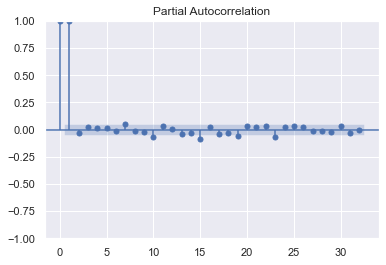

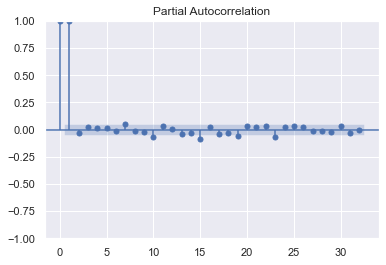

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(jpy)

In [18]:
from statsmodels.tsa.stattools import adfuller
adfuller(jp)[1]

3.9265584030321286e-30

In [9]:
adfuller(aud1)[1]

0.0

In [10]:
from statsmodels.tsa.arima.model import ARIMA
arim = ARIMA(jpy1, order = (1,1,3))
model = arim.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1304
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -978.969
Date:                Fri, 02 Jun 2023   AIC                           1967.937
Time:                        11:58:52   BIC                           1993.799
Sample:                             0   HQIC                          1977.640
                               - 1304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9972      0.012    -83.490      0.000      -1.021      -0.974
ma.L1         -0.0052      0.666     -0.008      0.994      -1.310       1.299
ma.L2         -0.9944      0.664     -1.498      0.134      -2.296       0.307
ma.L3         -0.0003      0.021     -0.016      0.987      -0.041       0.041
sigma2         0.2616      0.175      1.491      0.136      -0.082       0.606
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1831.13
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model.aic

1967.937171383636

In [12]:
vv = {}
vv

{}

In [31]:
vv['dd'] = 'ss'

In [32]:
vv

{'dd': 'ss'}

In [19]:
vals = {}
for x in range(3):
    for y in range(3):
        arim = ARIMA(jp, order = (x+1 ,0, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

{'1,1': 700.9391191548671,
 '1,2': 702.288678144624,
 '1,3': 704.4682754902208,
 '2,1': 702.4636991398586,
 '2,2': 693.4924878948768,
 '2,3': 695.4775235316893,
 '3,1': 704.3311112269632,
 '3,2': 695.4661630810152,
 '3,3': 697.4869484021236}

In [36]:
vals = {}
for x in range(5):
    for y in range(5):
        arim = ARIMA(jpy1, order = (x+1 ,0, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

{'1,1': 1960.6669815022449,
 '1,2': 1962.513126122861,
 '1,3': 1964.4974730558383,
 '1,4': 1965.948086232274,
 '1,5': 1967.0928415134763,
 '2,1': 1962.4991038582905,
 '2,2': 1949.4064291492741,
 '2,3': 1952.560035370805,
 '2,4': 1959.4220549572938,
 '2,5': 1958.6631178374255,
 '3,1': 1964.4957418509766,
 '3,2': 1952.5411322672403,
 '3,3': 1952.7962235133657,
 '3,4': 1954.8077024163108,
 '3,5': 1956.2887217164491,
 '4,1': 1965.8748993240056,
 '4,2': 1952.8908043869224,
 '4,3': 1956.6333869718121,
 '4,4': 1955.8898374477212,
 '4,5': 1958.1441610934453,
 '5,1': 1967.0512265253124,
 '5,2': 1955.1458937006257,
 '5,3': 1956.624924605874,
 '5,4': 1958.2769544098885,
 '5,5': 1959.5940898114081}

p,q = 2,2

In [37]:
vals = {}
for x in range(5):
    for y in range(5):
        arim = ARIMA(jpy1, order = (x+1 ,2, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'1,1': 2505.2785075631496,
 '1,2': 1985.3271922741005,
 '1,3': 1987.0359424838127,
 '1,4': 1989.6072808963017,
 '1,5': 1991.5734658183808,
 '2,1': 2349.3072198312248,
 '2,2': 1989.3355169905237,
 '2,3': 1988.994777633151,
 '2,4': 1981.3862063096685,
 '2,5': 1984.244738910641,
 '3,1': 2253.5307111594225,
 '3,2': 1990.6504090597869,
 '3,3': 1991.3801121318434,
 '3,4': 1991.9402978087776,
 '3,5': 1988.7167118184907,
 '4,1': 2206.4994793306264,
 '4,2': 1990.9197863127033,
 '4,3': 1993.5653811605148,
 '4,4': 1985.9511352708514,
 '4,5': 1989.8518410057602,
 '5,1': 2190.602728648544,
 '5,2': 2207.9343826440254,
 '5,3': 2249.3739552819598,
 '5,4': 1990.9814201441257,
 '5,5': 1991.311453719307}

In [38]:
vals = {}
for x in range(5):
    for y in range(5):
        arim = ARIMA(jpy1, order = (x+1 ,1, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Ma

{'1,1': 1965.4025649134583,
 '1,2': 1965.9378651372942,
 '1,3': 1967.937171383636,
 '1,4': 1969.591440087865,
 '1,5': 1971.5658277155758,
 '2,1': 1967.1881195494357,
 '2,2': 1967.9371757722924,
 '2,3': 1961.6902304304836,
 '2,4': 1966.2028600873955,
 '2,5': 2014.4165500434306,
 '3,1': 1969.1878655364449,
 '3,2': 1971.0345931074444,
 '3,3': 1964.8365527601065,
 '3,4': 1969.0043026715284,
 '3,5': 1974.9430367366374,
 '4,1': 1970.5368551112922,
 '4,2': 1971.5571036177296,
 '4,3': 1967.9542324572299,
 '4,4': 1968.1499937401795,
 '4,5': 1967.6545138551849,
 '5,1': 1972.5312966215035,
 '5,2': 1973.3337562545225,
 '5,3': 1970.0103371564305,
 '5,4': 1963.5092934985453,
 '5,5': 1960.9074614310598}

In [39]:

arim = ARIMA(jpy1, order = (2,0,2))
model = arim.fit()
model.summary()

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1304
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -968.703
Date:                Thu, 25 May 2023   AIC                           1949.406
Time:                        16:27:48   BIC                           1980.446
Sample:                             0   HQIC                          1961.051
                               - 1304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0181      0.014      1.266      0.206      -0.010       0.046
ar.L1          0.3341      0.017     20.134      0.000       0.302       0.367
ar.L2         -0.9831      0.017    -58.700      0.000      -1.016      -0.950
ma.L1         -0.3478      0.021    -16.932      0.000      -0.388      -0.308
ma.L2          0.9720      0.021     45.825      0.000       0.930       1.014
sigma2         0.2610      0.006     47.025      0.000       0.250       0.272
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              1732.67
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.87   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
arim = ARIMA(jp, order = (2,0,2))
model = arim.fit()
model.summary()

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  304
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -340.746
Date:                Fri, 02 Jun 2023   AIC                            693.492
Time:                        12:04:39   BIC                            715.795
Sample:                             0   HQIC                           702.414
                                - 304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0504      0.044      1.157      0.247      -0.035       0.136
ar.L1          0.3793      0.015     25.990      0.000       0.351       0.408
ar.L2         -0.9851      0.019    -51.995      0.000      -1.022      -0.948
ma.L1         -0.4184      0.017    -25.294      0.000      -0.451      -0.386
ma.L2          0.9951      0.058     17.253      0.000       0.882       1.108
sigma2         0.5444      0.045     12.102      0.000       0.456       0.633
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                88.92
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                            -0.53
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


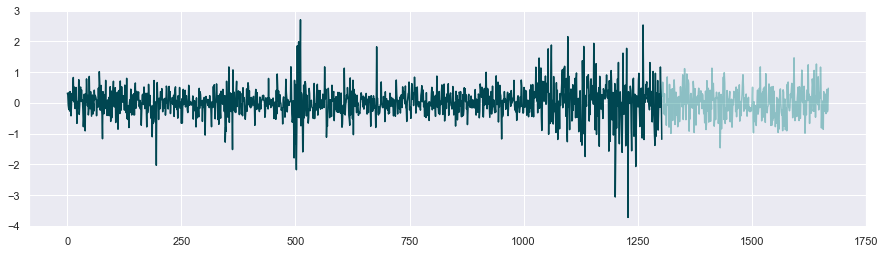

In [12]:
mod = sm.tsa.SARIMAX(jpy1, order=(2, 0, 2), trend='c')
res = mod.fit()

# Simulate data starting at the end of the time series
sim = res.simulate(365, anchor='end', repetitions=1)

# Plot the data and simulations
fig, ax = plt.subplots(figsize=(15, 4))
jpy1.plot(color='#004651', ax=ax)
sim.plot(ax=ax, color='teal', alpha=0.4, legend=False);

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


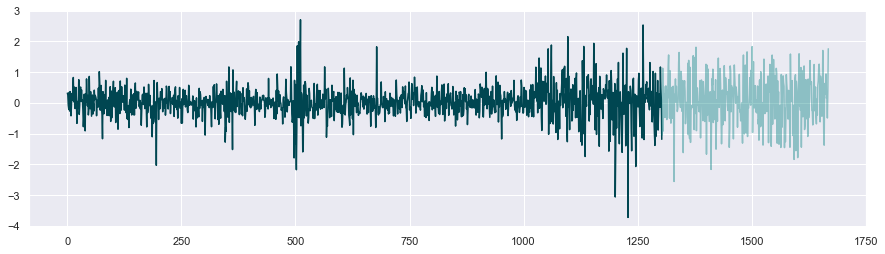

In [27]:
mod = sm.tsa.SARIMAX(jp, order=(2, 0, 2), trend='c')
res = mod.fit()

# Simulate data starting at the end of the time series
sim = res.simulate(365, anchor='end', repetitions=1)

# Plot the data and simulations
fig, ax = plt.subplots(figsize=(15, 4))
jpy1.plot(color='#004651', ax=ax)
sim.plot(ax=ax, color='teal', alpha=0.4, legend=False);

PORÓWNANIE DWÓCH PODEJŚĆ

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Usin

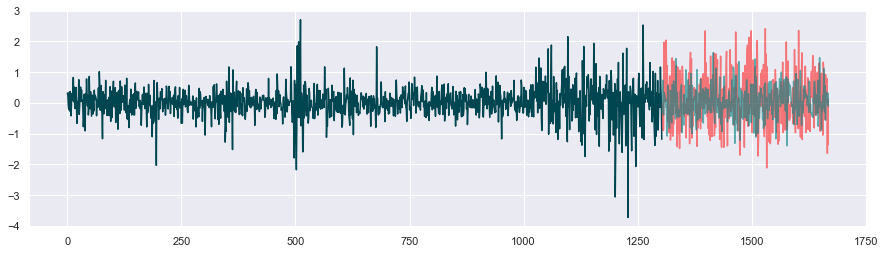

In [37]:


# Create and fit the model
mod1 = sm.tsa.SARIMAX(jpy1, order=(2, 0, 2), trend='c')
res1 = mod1.fit()

# Simulate data starting at the end of the time series
sim1 = res1.simulate(365, anchor='end', repetitions=1)

# Plot the data and simulations
fig, ax = plt.subplots(figsize=(15, 4))
jpy1.plot(color='#004651', ax=ax)


mod = sm.tsa.SARIMAX(jp, order=(2, 0, 2), trend='c')
res = mod.fit()

# Simulate data starting at the end of the time series
sim = res.simulate(365, anchor='end', repetitions=1)

sim.plot(ax=ax, color='red', alpha=0.5, legend=False)
sim1.plot(ax=ax, color='teal', alpha=0.6, legend=False);

In [38]:
import statsmodels.api as sm

# Create and fit the model
mod = sm.tsa.SARIMAX(jpy1, order=(2, 0, 2), trend='c')
res = mod.fit()


mod2 = sm.tsa.SARIMAX(jp, order=(2, 0, 2), trend='c')
res2 = mod2.fit()
# Simulate data starting at the end of the time series
vall = res.simulate(365, anchor='end', repetitions=1000)
val_365 = vall.iloc[-1]

vall2 = res2.simulate(365, anchor='end', repetitions=1000)
val2_365 = vall2.iloc[-1]

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Usin

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


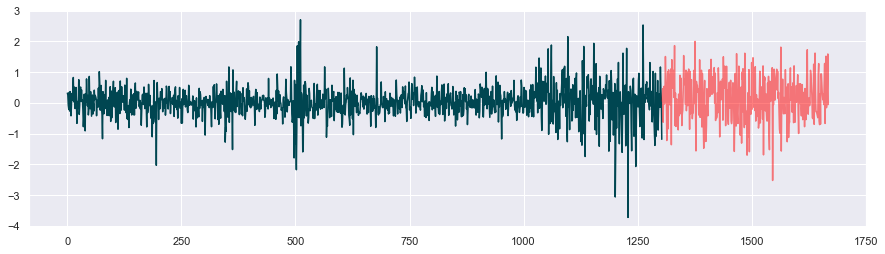

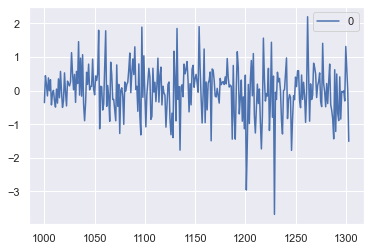

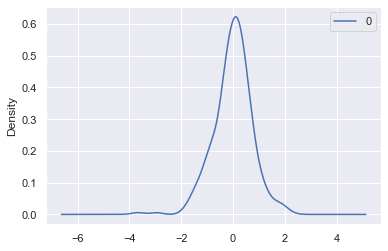

                0
count  304.000000
mean    -0.002100
std      0.742430
min     -3.682093
25%     -0.376754
50%      0.044090
75%      0.445439
max      2.193140


In [52]:
mod = sm.tsa.ARIMA(jp, order=(2, 0, 2), trend='c')
res = mod.fit()
sim = res.simulate(365, anchor='end', repetitions=1)
fig, ax = plt.subplots(figsize=(15, 4))
jpy1.plot(color='#004651', ax=ax)

sim.plot(ax=ax, color='red', alpha=0.5, legend=False)
plt.show()

residuals = pd.DataFrame(res.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

RESIDUA

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


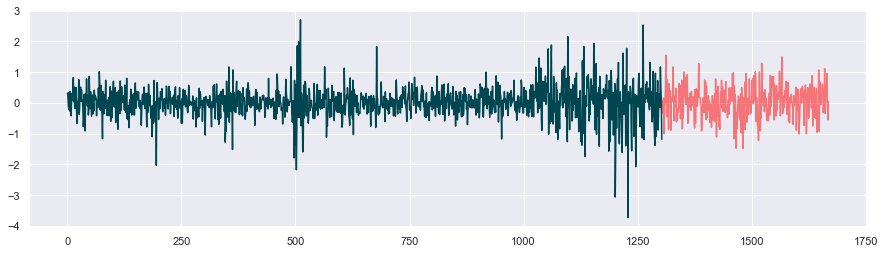

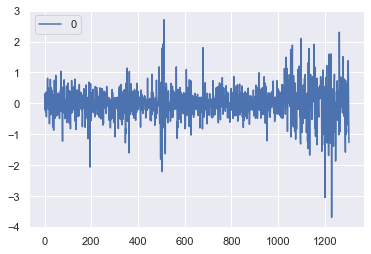

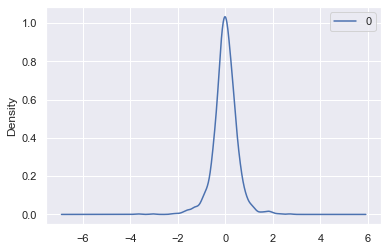

                 0
count  1304.000000
mean     -0.000489
std       0.508763
min      -3.690605
25%      -0.224014
50%       0.008313
75%       0.266602
max       2.707079


In [53]:
mod = sm.tsa.ARIMA(jpy1, order=(2, 0, 2), trend='c')
res = mod.fit()
sim = res.simulate(365, anchor='end', repetitions=1)
fig, ax = plt.subplots(figsize=(15, 4))
jpy1.plot(color='#004651', ax=ax)

sim.plot(ax=ax, color='red', alpha=0.5, legend=False)
plt.show()

residuals = pd.DataFrame(res.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [39]:
v = np.array(val_365)
v2 = np.array(val2_365)

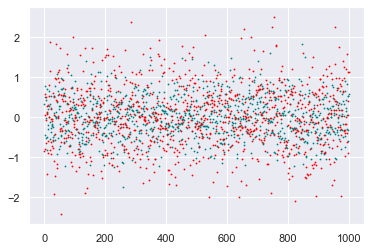

In [41]:
plt.scatter(range(len(v)), v, s =0.6, color="teal")
plt.scatter(range(len(v2)), v2, s =0.6, color="red")

# PODSUMOWUJĄC
## model ogólny - wszystkie dane
ARMA(2,2) - 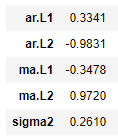
<br>
## model szczególny - szalona końcówka danych
ARMA(2,2) - 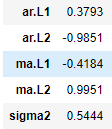

czyli modele są podobne charakterem, jedynie sigma jest dwukrotnie większa 

### dla modelu podstawowego:

In [101]:
np.quantile(v,0.99)

1.2232535457349982

In [102]:
np.quantile(v,0.95)

0.8501030266915327

In [103]:
np.quantile(v,0.01)

-1.1528355517006952

In [104]:
np.quantile(v,0.05)

-0.8368808786027552

### dla modelu z końcówki danych:

In [42]:
print(np.quantile(v2,0.99), np.quantile(v2,0.95), np.quantile(v2,0.01), np.quantile(v2,0.05))

1.8811753688665724 1.279592965059676 -1.7204949855219973 -1.2593547959508369


In [111]:
data = pd.Series(jpy1, name="jpy")

<AxesSubplot:>

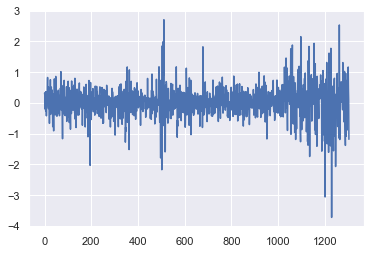

In [115]:
data.plot()

ja nie wiem co ten predict, ale no nie działa

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

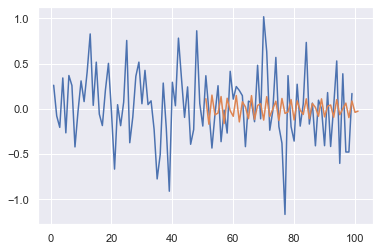

In [132]:
model=sm.tsa.statespace.SARIMAX(jpy1[1:100],order=(2, 0, 2))
results=model.fit()
forecast=results.predict(start=50,end=100,dynamic=True)
plt.plot(jpy1[1:100])
forecast.plot()

# BACKTESTING JAZDA

In [151]:
violations = [1,1,1,0,1,0,1,0, 1, 0,1, 0]

In [152]:
import vartests

vartests.kupiec_test(violations, var_conf_level=0.05, conf_level=0.95)

#vartests.duration_test(violations, conf_level=0.95)

{'log-likelihood': 14.374790473168991,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Reject H0'}

In [210]:
def ulsko(r, alpha, typ, l):
    
    param = []
    zwykla = []
    wazona = []
    mc = []
    
    vparam = []
    vzwykla = []
    vwazona = []
    vmc = []
    
    
    for i in range(int(len(r)/2),len(r)-1):
        
        past = r[i-652:i]
        m = np.mean(past)
        s = np.std(past)/np.sqrt(2)
        
        if typ == "param" or typ == "all":
            #PARAMETRYCZNA (ROZKŁAD)
            K1 = s*laplace.ppf(alpha) + m
            vparam.append(K1)
            if r[i+1] > K1:
                param.append(0)

            else:
                param.append(1)
                
        if typ == "zwykla" or typ == "all":
            ##ZWYKŁA HISTORYCZNA
            K2 = np.quantile(past, alpha)
            vzwykla.append(K2)
            if r[i+1] > K2:
                zwykla.append(0)

            else:
                zwykla.append(1)
                
        if typ == "wazona" or typ == "all":
            ##WAŻONA
            K3 = ważona(l, past, alpha)[1][0]
            vwazona.append(K3)
            if r[i+1] > K3:
                wazona.append(0)

            else:
                wazona.append(1)
                
        if typ == "mc" or typ == "all":
            ##MONTE CARLO
            mod = sm.tsa.SARIMAX(past, order=(2, 0, 2), trend='c')
            res = mod.fit()
            vall = res.simulate(365, anchor='end', repetitions=100)
            val_365 = np.array(vall.iloc[-1])
            K4 = np.quantile(val_365, alpha)
            vmc.append(K4)
            if r[i+1] > K4:
                mc.append(0)

            else:
                mc.append(1)
                
    print(param, zwykla, wazona, mc)
    return param, zwykla, wazona, mc, vparam, vzwykla, vwazona, vmc

## ALPHA = 0.95 -- $VaR_{95\%}$

In [211]:
I1 = ulsko(jpy1, 0.95, "param", 0.99)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [212]:
I2 = ulsko(jpy1, 0.95, "zwykla", 0.99)

[] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

In [213]:
I3 = ulsko(jpy1, 0.95, "wazona", 0.99)

[] [] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 

In [91]:
I4 = ulsko(jpy1, 0.95, "mc", 0.99)

[] [] [] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

In [214]:
len(I1[4])
len(jpy1[652:])

652

In [256]:
L1 = ulsko(jpy2, 0.95, "param", 0.99)
L2 = ulsko(jpy2, 0.95, "zwykla", 0.99)
L3 = ulsko(jpy2, 0.95, "wazona", 0.99)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [257]:
L4 = ulsko(jpy2, 0.95, "mc", 0.99)

[] [] [] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

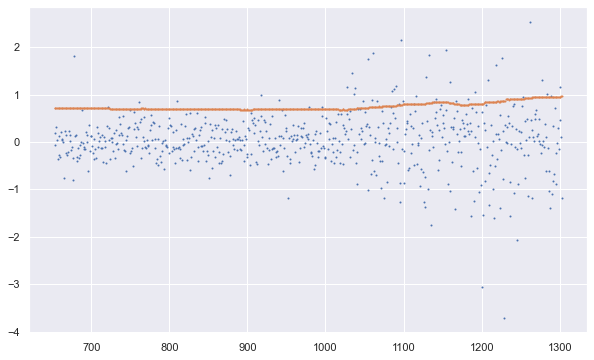

In [268]:
plt.figure(figsize = (10,6))
plt.scatter(range(653, len(jpy1)), jpy1[653:], s=1)
plt.scatter(range(653, len(jpy1)), I1[4], s=1)
plt.show()

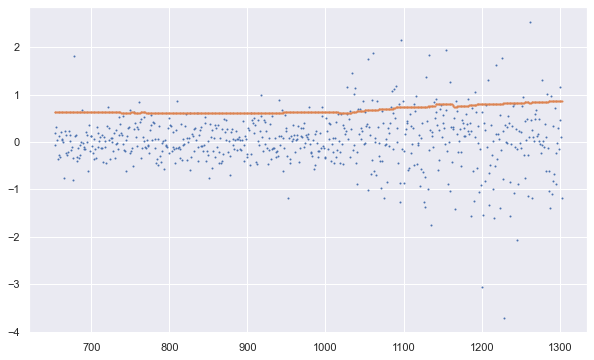

In [216]:
plt.figure(figsize = (10,6))
plt.scatter(range(653, len(jpy1)), jpy1[653:], s=1)
plt.scatter(range(653, len(jpy1)), I2[5], s=1)
plt.show()

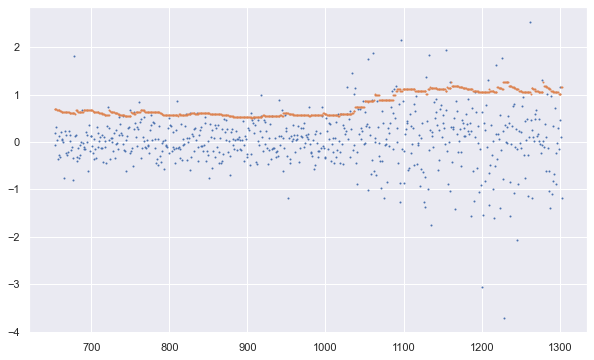

In [217]:
plt.figure(figsize = (10,6))
plt.scatter(range(653, len(jpy1)), jpy1[653:], s=1)
plt.scatter(range(653, len(jpy1)), I3[6], s=1)
plt.show()

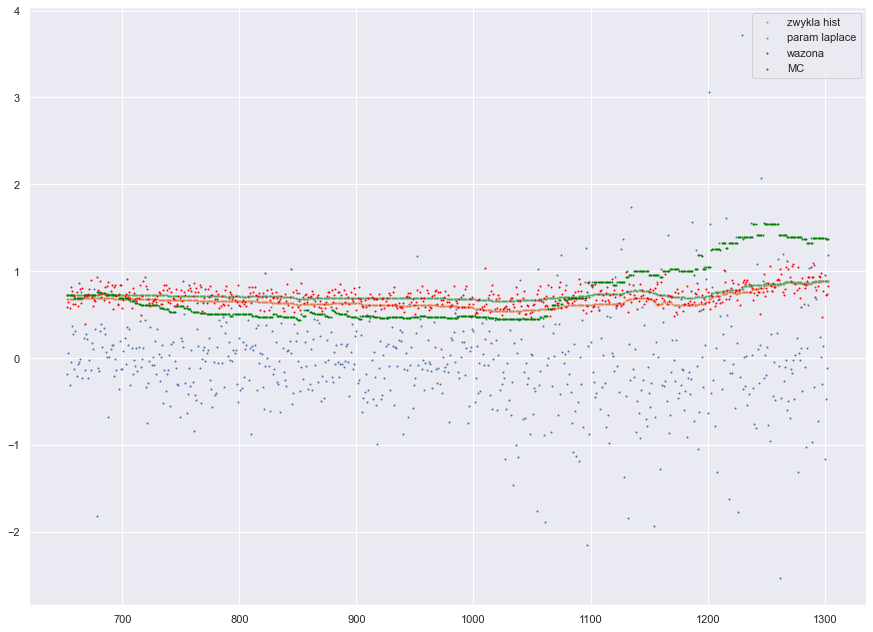

In [273]:
plt.figure(figsize = (15,11))
plt.scatter(range(653, len(jpy1)), jpy2[653:], s=1)
plt.scatter(range(653, len(jpy1)), L2[5], s=1, label="zwykla hist")
plt.scatter(range(653, len(jpy1)), L1[4], s=1, label="param laplace")
plt.scatter(range(653, len(jpy1)), L3[6], s=1, label="wazona", color="green")
plt.scatter(range(653, len(jpy1)), L4[7], s=1, label="MC", color="red")
plt.legend()
plt.show()

In [274]:
print(sum(L1[0]), len(L1[0]), sum(L1[0]) / len(L1[0]), np.var(L1[0]))
print(sum(L2[1]), len(L2[1]), sum(L2[1]) / len(L2[1]), np.var(L2[1]))
print(sum(L3[2]), len(L3[2]), sum(L3[2]) / len(L3[2]), np.var(L3[2]))
print(sum(L4[3]), len(L4[3]), sum(L4[3]) / len(L4[3]), np.var(L4[3]))

607 651 0.9324116743471582 0.0630201438882872
600 651 0.9216589861751152 0.07220369937777399
606 651 0.9308755760368663 0.0643462379748986
604 651 0.9278033794162827 0.06698426856000812


In [219]:
print(sum(I1[0]), len(I1[0]), sum(I1[0]) / len(I1[0]), np.var(I1[0]))
print(sum(I2[1]), len(I2[1]), sum(I2[1]) / len(I2[1]), np.var(I2[1]))
print(sum(I3[2]), len(I3[2]), sum(I3[2]) / len(I3[2]), np.var(I3[2]))
print(sum(I4[3]), len(I4[3]), sum(I4[3]) / len(I4[3]), np.var(I4[3]))

609 651 0.9354838709677419 0.06035379812695108
597 651 0.9170506912442397 0.07606872093270191
607 651 0.9324116743471582 0.06302014388828721
605 651 0.9293394777265745 0.06566761286547224


In [220]:
0.95*0.05 ## == var

0.0475

In [221]:
np.mean(I1[0]) ## == 0.95

0.9354838709677419

In [222]:
vartests.kupiec_test(I1[0], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 2.65608739347212,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Fail to reject H0'}

In [223]:
vartests.kupiec_test(I2[1], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 12.523035306717702,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Reject H0'}

In [224]:
vartests.kupiec_test(I3[2], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 3.8375854347182496,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Fail to reject H0'}

In [225]:
vartests.kupiec_test(I4[3], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 5.214143914661065,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Reject H0'}

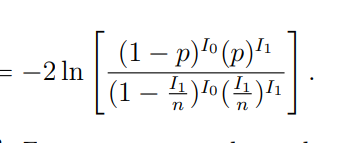

In [226]:
p = 0.95
i1 = sum(I1[0]) / len(I1[0])
i2 = sum(I2[1]) / len(I2[1])
i3 = sum(I3[2]) / len(I3[2])
i4 = sum(I4[3]) / len(I4[3])

def stat(p, I):
    I1 = sum(I)
    I0 = len(I) - I1
    print((1-p)**I0 * p**I1)
    print((1-I1/len(I))**I0 * (I1/len(I))**I1)
    return -2*np.log((1-p)**I0 * p**I1 / (1-I1/len(I))**I0 / (I1/len(I))**I1)

In [227]:
##parametrzyczna - rozkład - jest ok
stat(0.95, I1[0]) 

6.171856260745897e-69
2.329044852647126e-68


2.6560873934721343

In [228]:
##zwykła historyczna
stat(0.95, I2[1]) ##odrzucamy

2.7885124740179263e-84
1.461218482330691e-81


12.523035306717695

In [229]:
##ważona - jest git
stat(0.95, I3[2])

1.7096554738908335e-71
1.1647418766061642e-70


3.8375854347182523

In [230]:
##monte carlo
stat(0.95, I4[3]) ##odrzucamy

4.735887739309797e-74
6.421527758106202e-73


5.214143914661048

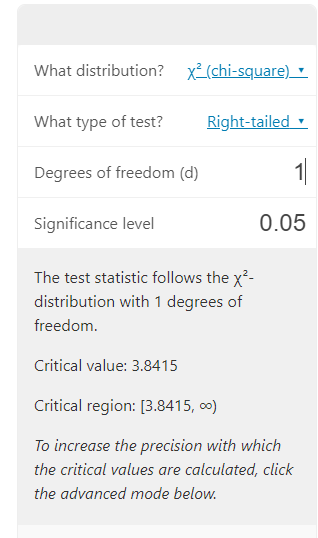

In [275]:
vartests.kupiec_test(L1[0], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 3.8375854347182496,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Fail to reject H0'}

In [276]:
vartests.kupiec_test(L2[1], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 9.458891809267357,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Reject H0'}

In [277]:
vartests.kupiec_test(L3[2], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 4.501990457351155,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Reject H0'}

In [278]:
vartests.kupiec_test(L4[3], var_conf_level=0.05, conf_level=0.95)

{'log-likelihood': 5.973084844680983,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.95',
 'result': 'Reject H0'}

### ALPHA = 0.99 --  $VaR_{99\%}

In [283]:
J1 = ulsko(jpy1, 0.99, "param", 0.99)
J2 = ulsko(jpy1, 0.99, "zwykla", 0.99)
J3 = ulsko(jpy1, 0.99, "wazona", 0.99)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [154]:
J4 = ulsko(jpy1, 0.99, "mc", 0.99)

[] [] [] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [258]:
P1 = ulsko(jpy2, 0.99, "param", 0.99)
P2 = ulsko(jpy2, 0.99, "zwykla", 0.99)
P3 = ulsko(jpy2, 0.99, "wazona", 0.99)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [259]:
P4 = ulsko(jpy2, 0.99, "mc", 0.99)

[] [] [] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [160]:
AA = jpy1[653:]
len(J4[3])
AA[]

651

In [284]:
vartests.kupiec_test(J1[0], var_conf_level=0.01)

{'log-likelihood': 3.7445118183333648,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Fail to reject H0'}

In [285]:
vartests.kupiec_test(J2[1], var_conf_level=0.01)

{'log-likelihood': 2.591581562985297,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Fail to reject H0'}

In [286]:
vartests.kupiec_test(J3[2], var_conf_level=0.01)

{'log-likelihood': 1.623845760573431,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Fail to reject H0'}

In [254]:
vartests.kupiec_test(J4[3], var_conf_level=0.01, conf_level=0.95)

{'log-likelihood': 33.62279748031932,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Reject H0'}

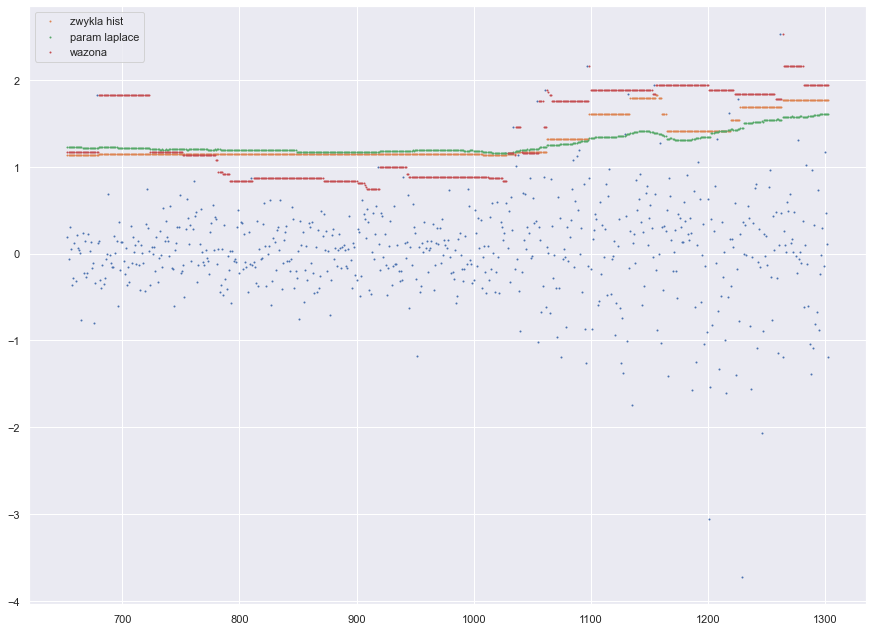

In [240]:
plt.figure(figsize = (15,11))
plt.scatter(range(653, len(jpy1)), jpy1[653:], s=1)
plt.scatter(range(653, len(jpy1)), J2[5], s=1, label="zwykla hist")
plt.scatter(range(653, len(jpy1)), J1[4], s=1, label="param laplace")
plt.scatter(range(653, len(jpy1)), J3[6], s=1, label="wazona")
plt.legend()
plt.show()

In [241]:
print(sum(J1[0]), len(J1[0]), sum(J1[0]) / len(J1[0]), np.var(J1[0]))
print(sum(J2[1]), len(J2[1]), sum(J2[1]) / len(J2[1]), np.var(J2[1]))
print(sum(J3[2]), len(J3[2]), sum(J3[2]) / len(J3[2]), np.var(J3[2]))
print(sum(J4[3]), len(J4[3]), sum(J4[3]) / len(J4[3]), np.var(J4[3]))

639 651 0.9815668202764977 0.018093397608783368
640 651 0.9831029185867896 0.016611570052925784
641 651 0.9846390168970814 0.015125023301030438
625 651 0.9600614439324117 0.03834346780682443


In [260]:
vartests.kupiec_test(P1[0], var_conf_level=0.01)

{'log-likelihood': 8.173657231441098,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Reject H0'}

In [262]:
vartests.kupiec_test(P2[1], var_conf_level=0.01)

{'log-likelihood': 9.936406035399983,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Reject H0'}

In [264]:
vartests.kupiec_test(P3[2], var_conf_level=0.01)

{'log-likelihood': 5.0674320711528935,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Reject H0'}

In [265]:
vartests.kupiec_test(P4[3], var_conf_level=0.01, conf_level=0.95)

{'log-likelihood': 36.493305522249074,
 'chi square critical value': 3.841458820694124,
 'null hypothesis': 'Probability of failure is 0.99',
 'result': 'Reject H0'}

In [266]:
print(sum(P1[0]), len(P1[0]), sum(P1[0]) / len(P1[0]), np.var(P1[0]))
print(sum(P2[1]), len(P2[1]), sum(P2[1]) / len(P2[1]), np.var(P2[1]))
print(sum(P3[2]), len(P3[2]), sum(P3[2]) / len(P3[2]), np.var(P3[2]))
print(sum(P4[3]), len(P4[3]), sum(P4[3]) / len(P4[3]), np.var(P4[3]))

636 651 0.9769585253456221 0.022510565100129547
635 651 0.9754224270353302 0.023973515871836066
638 651 0.9800307219662059 0.019570505968603193
624 651 0.9585253456221198 0.039754507422115566
